---
title: "Basics of Exploratory Data Analysis"
date: "2025-05-09"
categories: [machine learning, python, kaggle]
format:
  html: default
  pdf: false
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set the overall style (whitegrid is good for plots with grids)
sns.set_style("darkgrid")

# Set a pinkish color palette
sns.set_palette("pastel")  # or use a custom one below

# Define a custom pinkish color palette
# pink_palette = ["#FFC0CB", "#FF69B4", "#FFB6C1", "#DB7093", "#FF1493"]
blue_palette = ["#a2cffe", "#70b7f0", "#4693e0", "#1c6fdc", "#0047ab"]

sns.set_palette(blue_palette)

# Loading the data
- This data is from the Playground series in Kaggle (Season 5, Episode 5)
    - Calorie Prediction Competition
- We let the `id` column in csv files to be the indexes in the dataframe, else it would have become an additional and unnecessary feature to handle

In [1]:
train_df = pd.read_csv('playground-series-s5e5/train.csv', index_col='id')
test_df = pd.read_csv('playground-series-s5e5/test.csv', index_col='id')
original_df = pd.read_csv('playground-series-s5e5/calories.csv', index_col="User_ID")

# Understanding the data

1. Below we check if any `Missing` or `NaN` values present in either 'train', 'test', 'original' data

In [2]:
# train_df.isna().sum().eq(0).all()
print((train_df.isna().sum() == 0).all())
print((test_df.isna().sum() == 0).all())

True
True


2. Getting information on all features in the data, particularly we can find which columns are numerical and which are not
    - We identify that by looking at the `Dtype` for each column
        - `Object`: Categorical / text or string
        - `float`/`int`: is numerical, discrete or continuous
    - This data looks fairly straight forward, as mostly the features seem numerical
    - Only `Sex` feature is categorical, but that is also easy to handle as it has only 2 unique values

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


3. The stats of all numerical columns in train & test data look similar
    - If you try comparing any statistic for a column in both train & test, they are very close
    - So we can think of these data coming in from same distribution

In [4]:
print(train_df.describe().T)
print('--- ' * 20)
print(test_df.describe().T)

               count        mean        std    min    25%    50%    75%    max
Age         750000.0   41.420404  15.175049   20.0   28.0   40.0   52.0   79.0
Height      750000.0  174.697685  12.824496  126.0  164.0  174.0  185.0  222.0
Weight      750000.0   75.145668  13.982704   36.0   63.0   74.0   87.0  132.0
Duration    750000.0   15.421015   8.354095    1.0    8.0   15.0   23.0   30.0
Heart_Rate  750000.0   95.483995   9.449845   67.0   88.0   95.0  103.0  128.0
Body_Temp   750000.0   40.036253   0.779875   37.1   39.6   40.3   40.7   41.5
Calories    750000.0   88.282781  62.395349    1.0   34.0   77.0  136.0  314.0
--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
               count        mean        std    min    25%    50%    75%    max
Age         250000.0   41.452464  15.177769   20.0   28.0   40.0   52.0   79.0
Height      250000.0  174.725624  12.822039  127.0  164.0  174.0  185.0  219.0
Weight      250000.0   75.147712  13.979513   39.0

4. Get column names seperated into numerical & categorical categories

In [5]:
numerical_columns = [col for col in train_df.columns if train_df[col].dtype != 'object']
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'object']

# numerical_columns = []
# categorical_columns = []
# for col in train_df.columns:
#     if train_df[col].dtype != 'object':
#         numerical_columns.append(col)
#     else:
#         categorical_columns.append(col)

In [6]:
numerical_columns

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [7]:
categorical_columns

['Sex']

# Univariate analysis: Plotting the data

1. Plot the categorical features, observations from below plots:
    - Well balanced male / female classes in the train data
    - When plotting box-plt of sex vs calories; min/max, all quartiles are located similarly for both male and female classes. Although there are a few more outliers calories in male class as compared to female class.

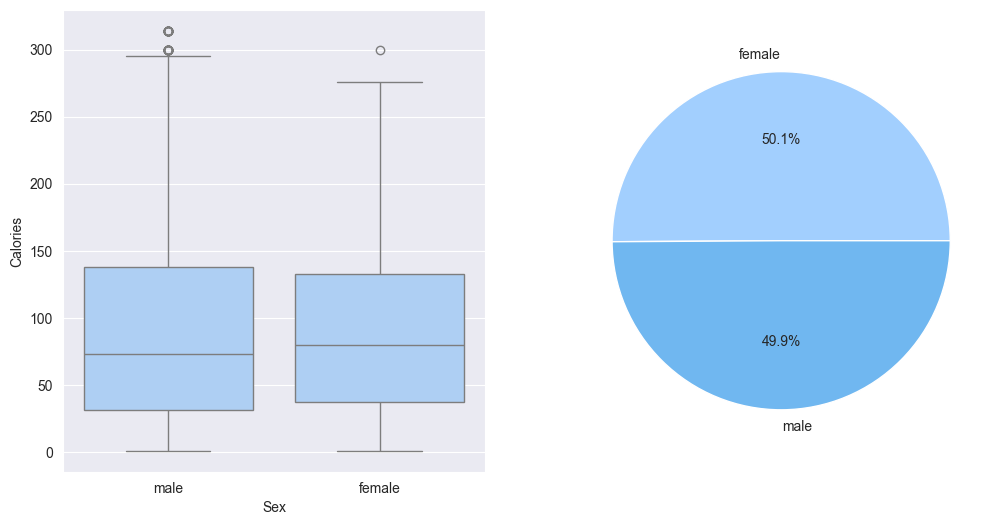

In [8]:
for col in categorical_columns:
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.boxplot(x=train_df[col], y=train_df['Calories'])
    
    plt.subplot(1,2,2)
    counts = train_df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

In [9]:
train_df[numerical_columns].skew()

Age           0.436397
Height        0.051777
Weight        0.211194
Duration      0.026259
Heart_Rate   -0.005668
Body_Temp    -1.022361
Calories      0.539196
dtype: float64

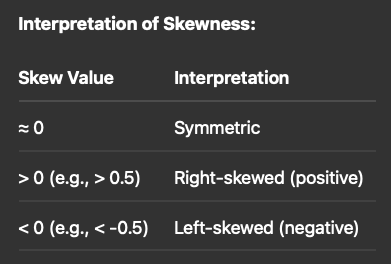

2. Plotting and observe the numerical features:
    - `Age`: heavily skewed to right
        - frequency decrease with increase in age
        - may suggest that mostly younger people using the workout monitoring app
    - `Height`: 
        - minimal skew
        - symmetrical, bell shaped, approximately Gaussian (Normal) distribution
    - `Weight`: 
        - slightly right skewed, which represent real-world data, upper limits can vary for wegihts
    - `Duration`: 
        - approximately Uniform distribution
    - `Heart_rate`: 
        - Normally distributed with slight righ skew
        - small portion of people with elevated heart rates
    - `Body_temp`: 
        - Negatively skewed
        - after workout, slightly elevated from normal temperatures makes sense
    - `Calories`: 
        - Right skewed, most people burn fewer calories per session, small fraction burn significantly more

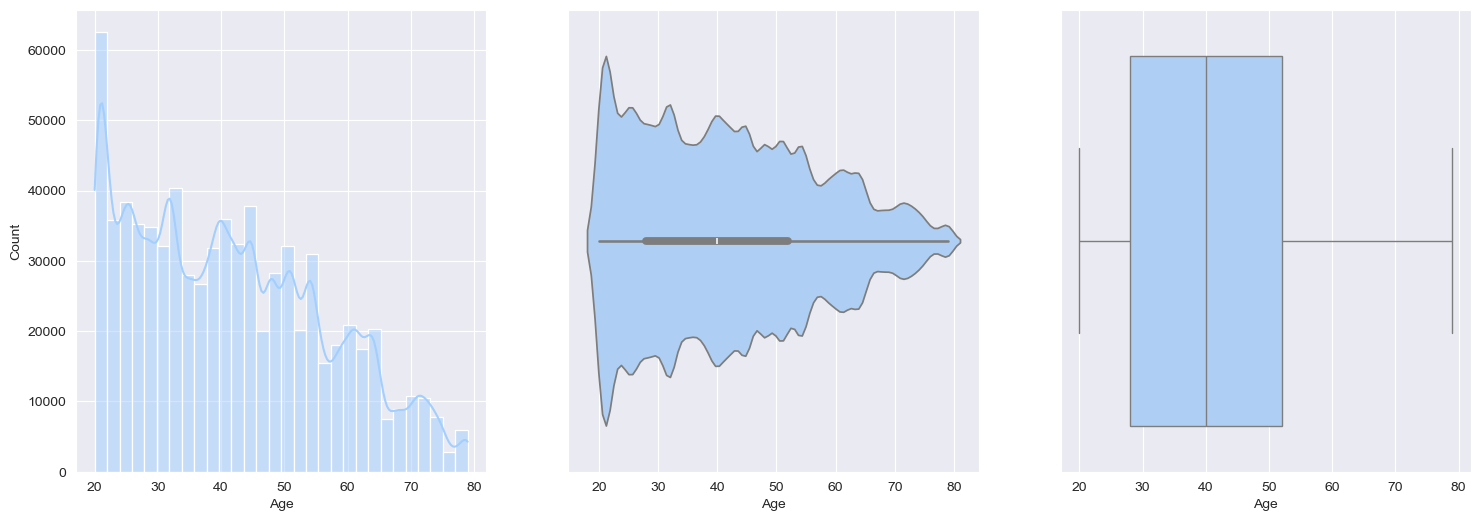

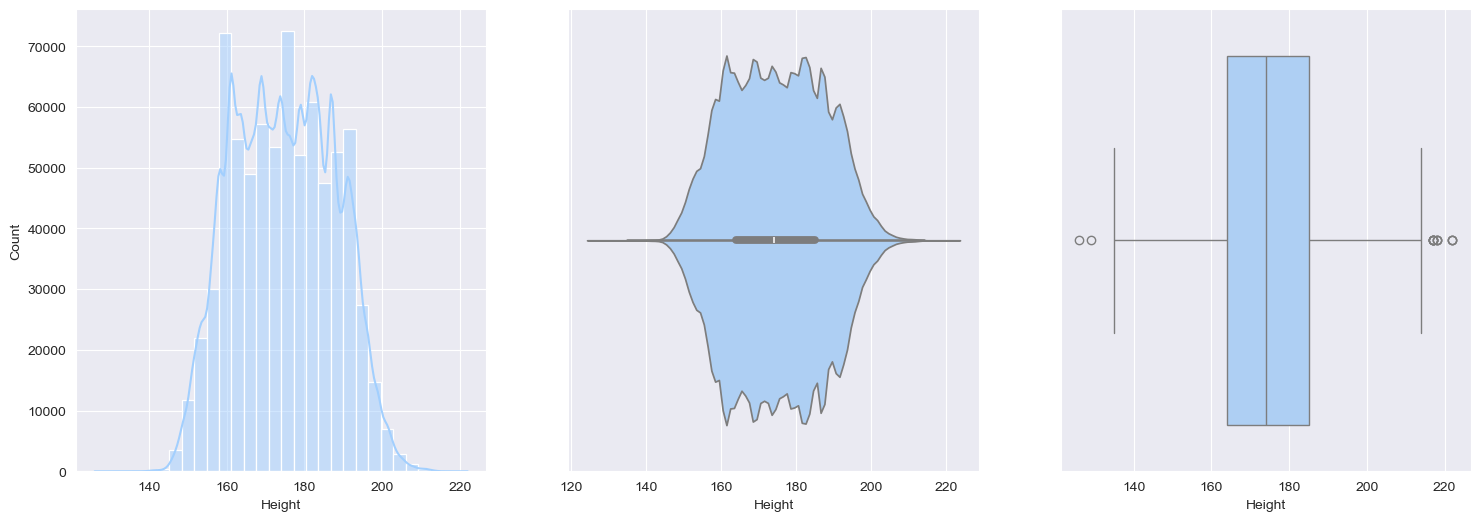

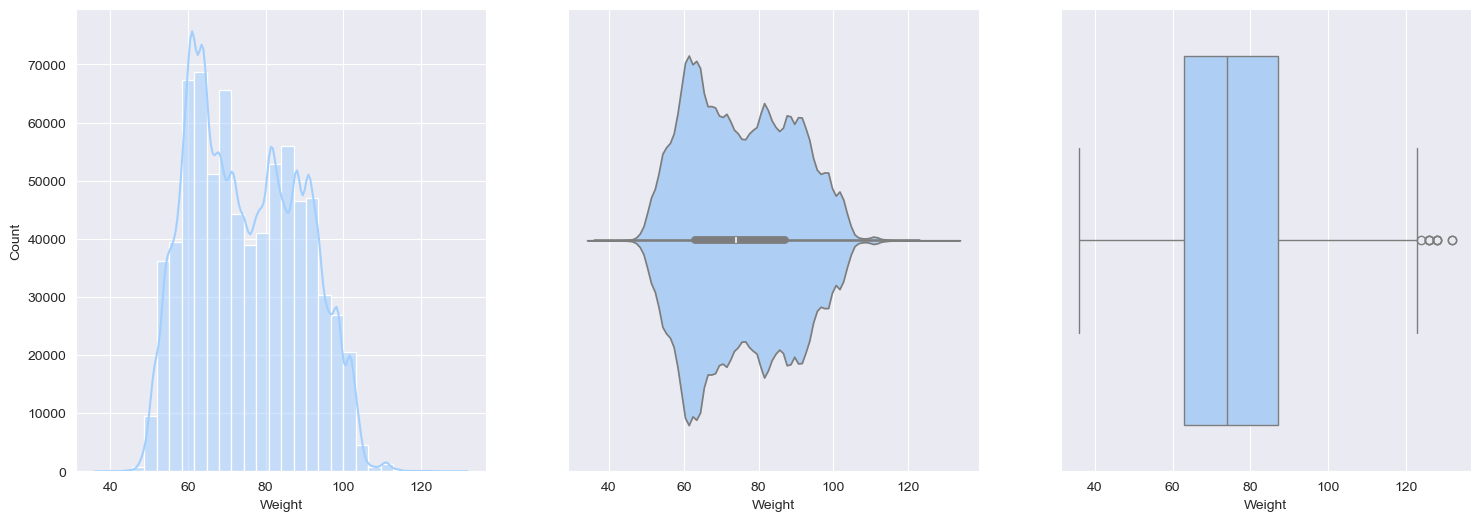

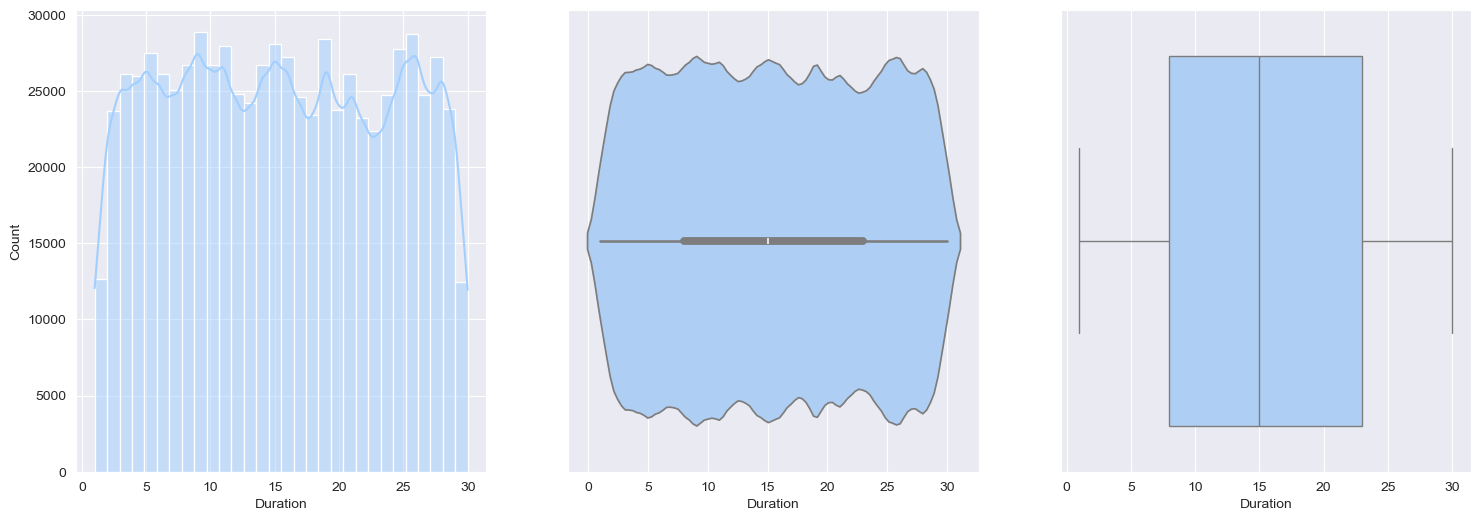

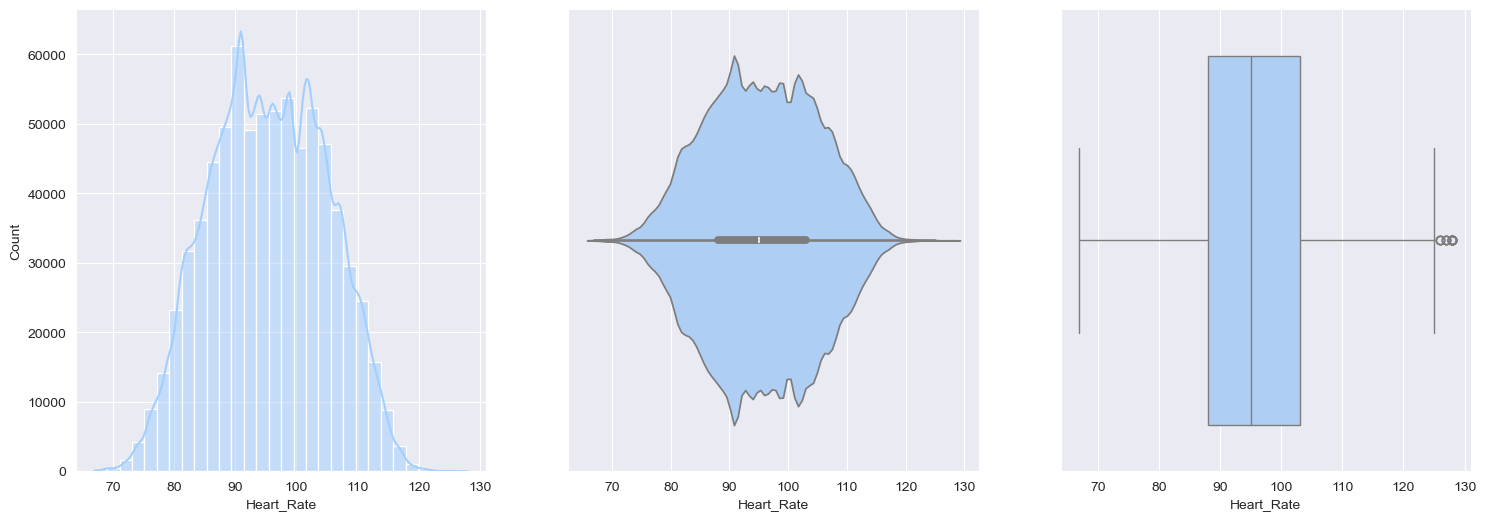

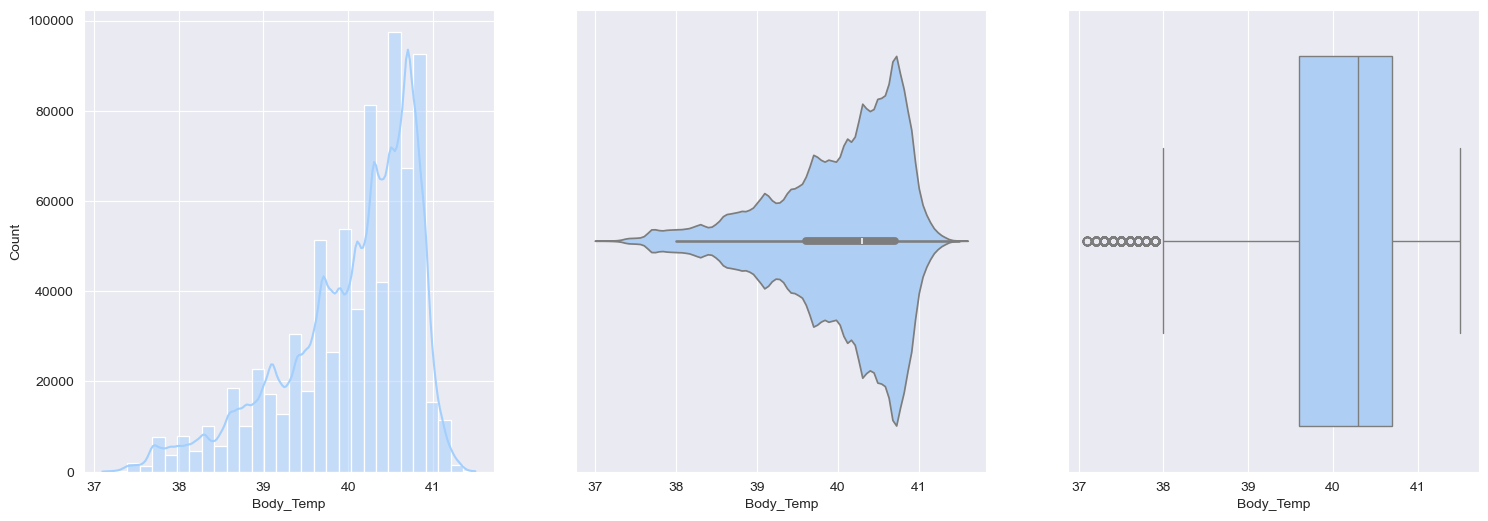

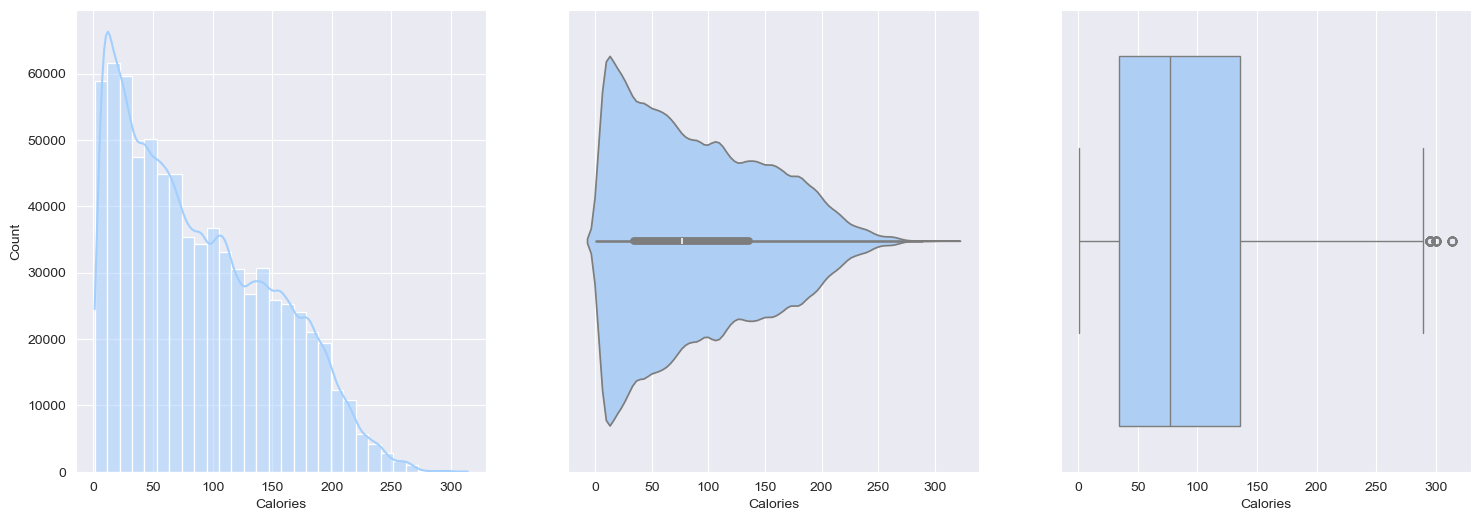

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(18,6))

    plt.subplot(1,3,1)
    sns.histplot(data=train_df[col], bins=30, kde=True)

    plt.subplot(1,3,2)
    sns.violinplot(x=train_df[col])

    plt.subplot(1,3,3)
    sns.boxplot(data=train_df[col], orient='h')

In [ ]:
# There are "14,919" outliers in Body_temp feature, where temperature is less than 30
train_df[train_df['Body_Temp']<38].shape[0]

14919

# Bivariate analysis

1. Let's find the **Correlations** between the numerical features

In [23]:
# train_df[numerical_columns].corr().style.background_gradient()
corr = train_df[numerical_columns].corr()
corr

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


<Axes: >

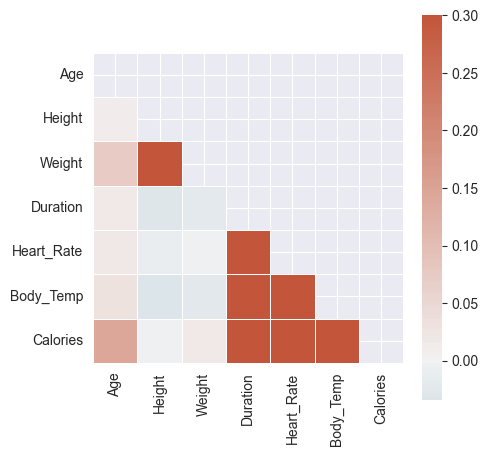

In [24]:
# Plot the correlation matrix with colors

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(5, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Quite clear from above color gradients:
    - `Calories` is highly correlated with `Duration`, `Heart_Rate`, `Body_Temp`
    - `Heart_Rate` and `Body_Temp` are highly correlated
    - `Duration` and `Heart_Rate` are highly correlated
    - `Duration` and `Body_Temp` are highly correlated

2. Scatter plots amongst the numerical features
    - Hardly any patterns emerge when we compare `Calories` to `Age`, `Weight`, `Height`
    - Whereas, **strong patterns** can be seen with `Duration`, `Heart_Rate`, `Body_Temp`

So it's fair to say that scatter plots confirm the correlation numbers

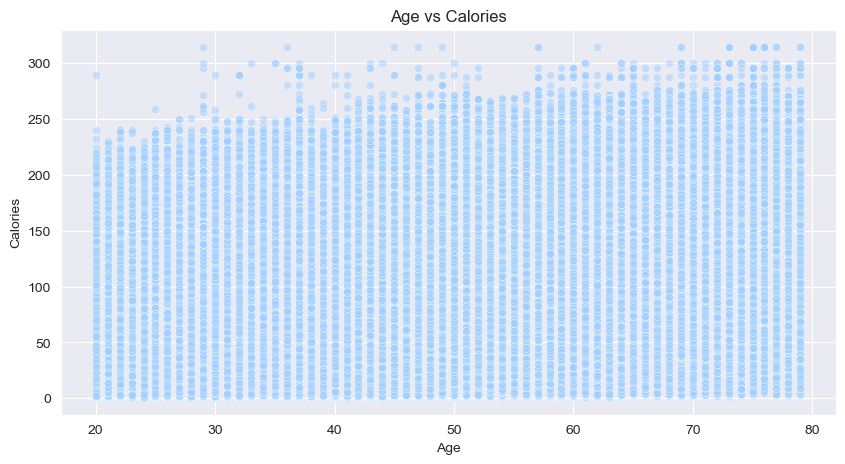

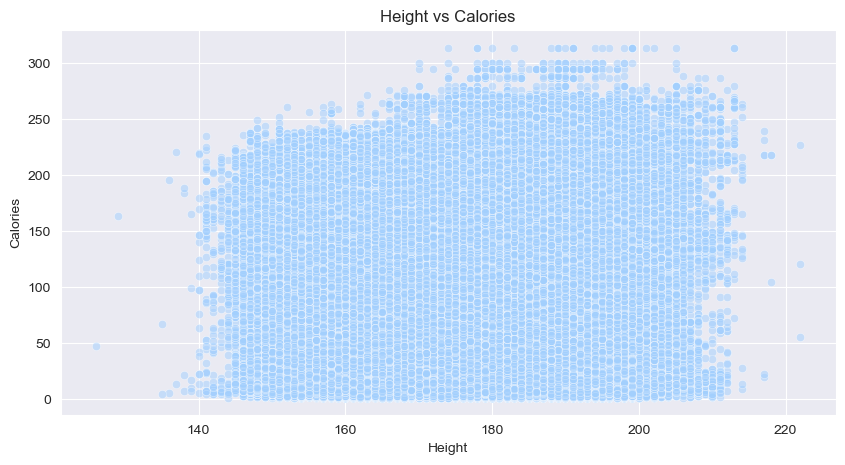

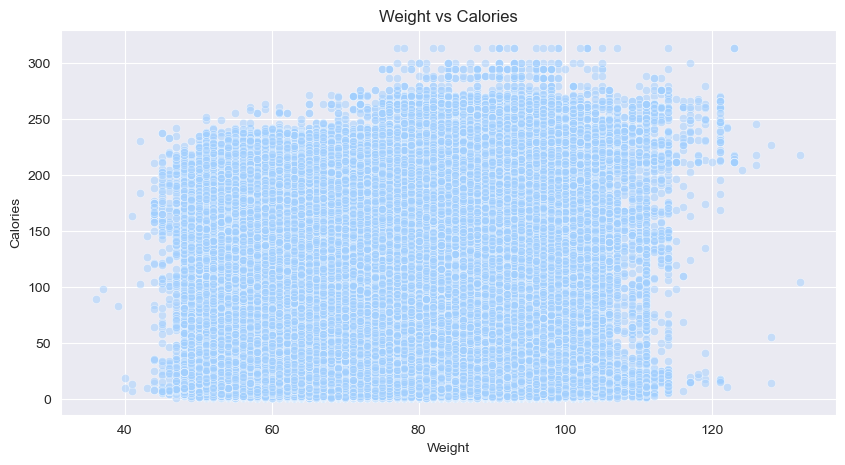

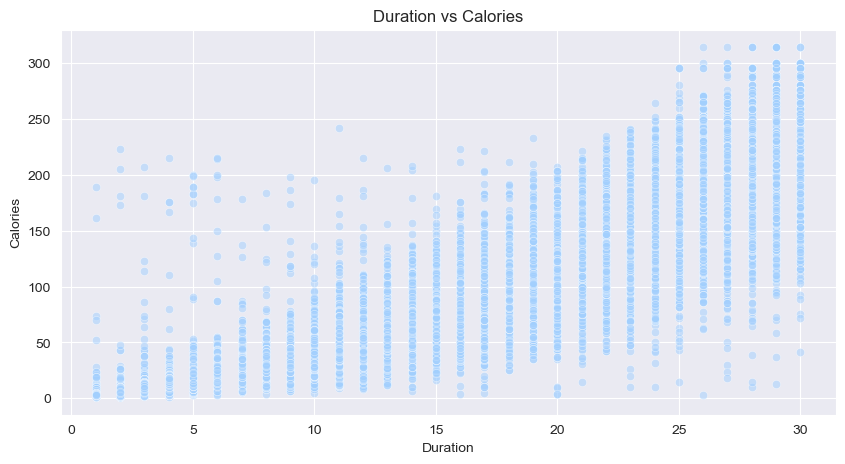

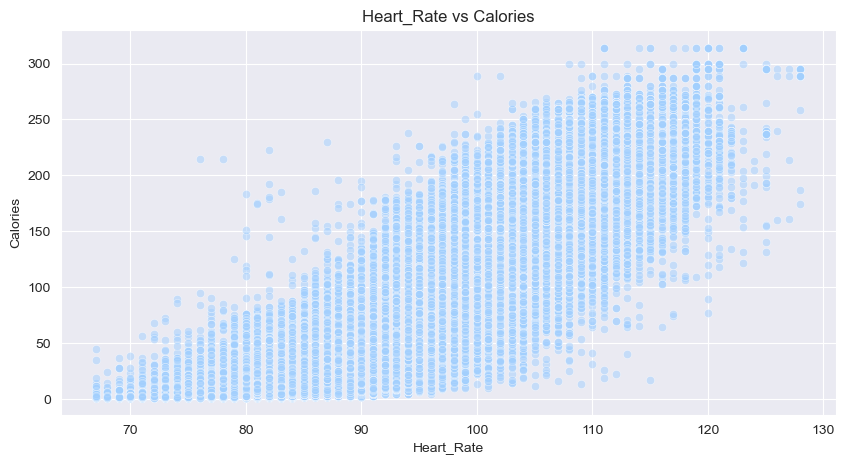

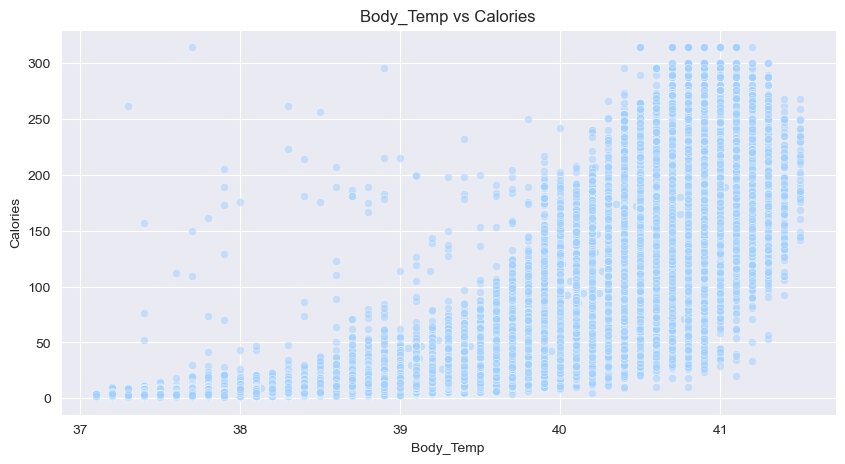

In [17]:
for col in numerical_columns[:-1]:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=train_df[col], y=train_df['Calories'], alpha=0.5)
    plt.title(f'{col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')
    plt.show()

## Data preprocessing

In [18]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

In [31]:
X = train_df.drop('Calories', axis=1)
y = np.log1p(train_df['Calories'])

X_test = test_df

Text(0.5, 0, 'Log of Calories')

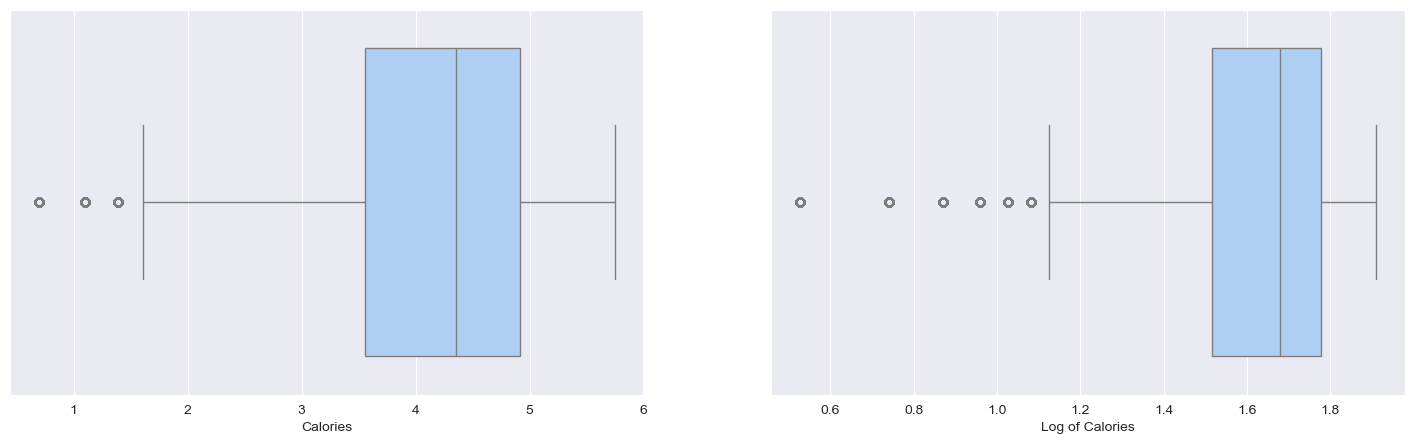

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(y, orient='h')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(y), orient='h')
plt.xlabel(f'Log of Calories')

In [21]:
original_df['Gender'] = original_df['Gender'].map({'male':0, 'female':1})
original_df = original_df.rename(columns={'Gender': 'Sex'})

In [33]:
X_original = original_df.drop('Calories', axis=1)
y_original = np.log1p(original_df['Calories'])

In [34]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mi = mutual_info_regression(X=X, y=y, n_neighbors=5)
mi
# this way we can get the Mutual Information scores of every feature in X against y (target)

array([0.016463  , 0.09825665, 0.05492303, 0.05537672, 1.64154125,
       0.97683727, 1.12166262])

In [36]:
X.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [49]:
mutual_info = pd.Series(mi)
mutual_info.index = X.columns
mutual_info

Sex           0.016463
Age           0.098257
Height        0.054923
Weight        0.055377
Duration      1.641541
Heart_Rate    0.976837
Body_Temp     1.121663
dtype: float64

In [ ]:
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns=['Mutual Information'])

In [52]:
mutual_info.style.bar(subset='Mutual Information')#, cmap='RdYlGn')

,Mutual Information
Duration,1.641541
Body_Temp,1.121663
Heart_Rate,0.976837
Age,0.098257
Weight,0.055377
Height,0.054923
Sex,0.016463


In [62]:
mi_original = mutual_info_regression(X=X_original, y=y_original, n_neighbors=5)
mutual_info_original = pd.Series(mi_original)
mutual_info_original.index = X_original.columns
mutual_info_original = pd.DataFrame(mutual_info_original.sort_values(ascending=False), columns=['Mutual Information'])
mutual_info_original.style.bar(subset='Mutual Information')#, cmap='RdYlGn')

,Mutual Information
Duration,1.510654
Body_Temp,0.987192
Heart_Rate,0.875529
Age,0.030383
Weight,0.019115
Sex,0.008419
Height,0.003110
